<a href="https://colab.research.google.com/github/masatt/noise2noise/blob/main/test_noise2noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/joeylitalien/noise2noise-pytorch.git

Cloning into 'noise2noise-pytorch'...
remote: Enumerating objects: 739, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 739 (delta 0), reused 1 (delta 0), pack-reused 736
Receiving objects: 100% (739/739), 31.00 MiB | 32.20 MiB/s, done.
Resolving deltas: 100% (380/380), done.


In [8]:
%cd noise2noise-pytorch/

/content/noise2noise-pytorch


In [9]:
!pip3 install --user -r requirements.txt

  Created wheel for OpenEXR: filename=OpenEXR-1.3.2-cp37-cp37m-linux_x86_64.whl size=189353 sha256=5d31a81adcd3d39c2cb9cf1666e6970a3a0b8816f6eb626212e1f7a1c3a94e4a
  Stored in directory: /root/.cache/pip/wheels/d1/c6/6c/dcf5d042ed2d547da41021f47957b16bebe9cadfd095765d44
Successfully built OpenEXR


In [11]:
!mkdir data
%cd data
!mkdir train valid test
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip
%cd val2017
!mv `ls | head -4200` ../train
!mv `ls | head -800` ../valid

ストリーミング出力は最後の 5000 行に切り捨てられました。
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extract

In [13]:
%cd ../../src

/content/noise2noise-pytorch/src


In [14]:
%%bash
python3 train.py \
  --train-dir ../data/train --train-size 1000 \
  --valid-dir ../data/valid --valid-size 200 \
  --ckpt-save-path ../ckpts \
  --ckpt-overwrite \
  --report-interval 5 \
  --nb-epochs 100 \
  --loss l2 \
  --noise-type gaussian \
  --noise-param 50 \
  --crop-size 64 \
  --plot-stats \
  --cuda

Noise2Noise: Learning Image Restoration without Clean Data (Lethinen et al., 2018)
Training parameters: 
  Train dir = ../data/train
  Valid dir = ../data/valid
  Ckpt save path = ../ckpts
  Ckpt overwrite = True
  Report interval = 5
  Train size = 1000
  Valid size = 200
  Learning rate = 0.001
  Adam = [0.9, 0.99, 1e-08]
  Batch size = 4
  Nb epochs = 100
  Loss = l2
  Cuda = True
  Plot stats = True
  Noise type = gaussian
  Noise param = 50.0
  Seed = None
  Crop size = 64
  Clean targets = False

EPOCH 1 / 100
Batch   5 / 250 | Avg loss: 0.21034 | Avg train time / batch: 70 ms
Batch  10 / 250 | Avg loss: 0.06662 | Avg train time / batch: 22 ms
Batch  15 / 250 | Avg loss: 0.03392 | Avg train time / batch: 22 ms
Batch  20 / 250 | Avg loss: 0.03000 | Avg train time / batch: 21 ms
Batch  25 / 250 | Avg loss: 0.01971 | Avg train time / batch: 21 ms
Batch  30 / 250 | Avg loss: 0.02726 | Avg train time / batch: 20 ms
Batch  35 / 250 | Avg loss: 0.02205 | Avg train time / batch: 20 ms
Ba

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [78]:
cp ../figures/monarch-gaussian-noisy.png ../data/test

In [79]:
%%bash
python3 test.py \
  --data ../data/test \
  --load-ckpt ../ckpts/gaussian/n2n-gaussian.pt \
  --noise-type gaussian \
  --noise-param 50 \
  --crop-size 256 \
  --show-output 3 \
  --cuda


Noise2Noise: Learning Image Restoration without Clean Data (Lethinen et al., 2018)
Loading checkpoint from: ../ckpts/gaussian/n2n-gaussian.pt
Saving images and montages to: ../data/denoised


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [82]:
ls ../data/denoised

monarch-gaussian-noisy-gaussian-denoised.png
monarch-gaussian-noisy-gaussian-montage.png
monarch-gaussian-noisy-gaussian-noisy.png


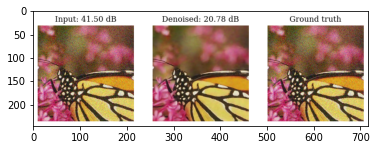

In [86]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#filename = "nurse.jpg"
filename =  '../data/denoised/monarch-gaussian-noisy-gaussian-montage.png'
imgCV = cv2.imread(filename)

# cv2.cvtColorを使う方法
imgCV_RGB = cv2.cvtColor(imgCV,cv2.COLOR_BGR2RGB)

# スライスを使う方法
# imgCV_RGB = imgCV[:, :, ::-1]

plt.imshow(imgCV_RGB)
plt.show()